In [1]:
import kagglehub


path = kagglehub.dataset_download("camnugent/california-housing-prices")


In [2]:

print("Path to dataset files:", path)

Path to dataset files: C:\Users\TRITON\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


In [3]:
import pandas as pd
hero_1 = pd.read_csv(f"{path}/housing.csv")
print(hero_1.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
hero_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
hero_1["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
hero_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


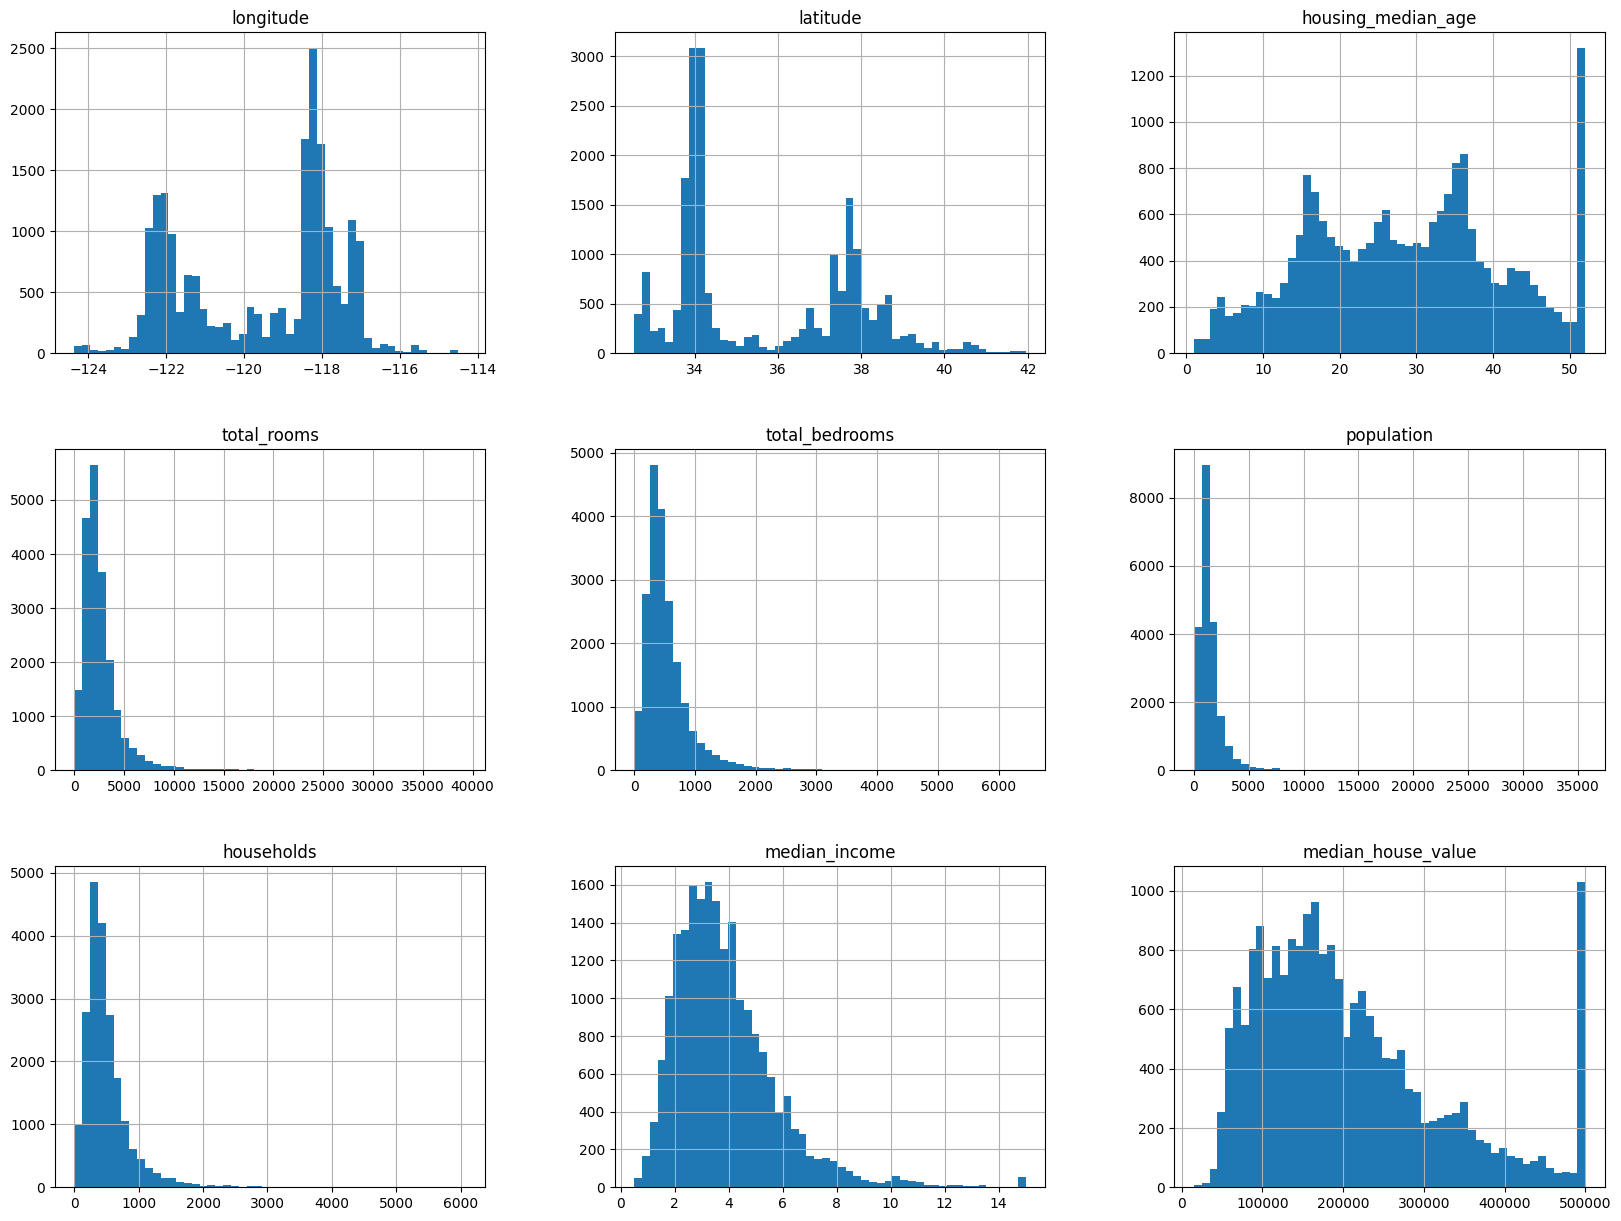

In [7]:
import matplotlib.pyplot as plt
hero_1.hist(bins=50, figsize=(20,15))
plt.show()  

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hero_1, test_size=0.2, random_state=42)

In [9]:
import numpy as np
hero_1["income_cat"] =np.ceil(hero_1["median_income"] / 1.5)
hero_1["income_cat"].where(hero_1["income_cat"] < 5, 5.0, inplace=True)

C:\Users\TRITON\AppData\Local\Temp\ipykernel_18988\2584253151.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hero_1["income_cat"].where(hero_1["income_cat"] < 5, 5.0, inplace=True)


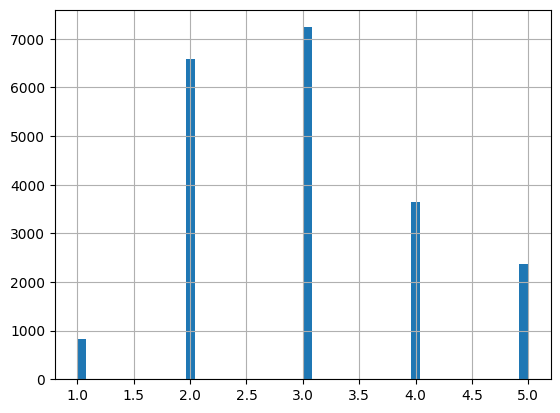

In [10]:
hero_1["income_cat"].hist(bins=50)
plt.show()

In [11]:
hero_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index , test_index in split.split(hero_1, hero_1["income_cat"]):
    strat_train_set = hero_1.loc[train_index]
    strat_test_set = hero_1.loc[test_index]


strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0


In [13]:
strat_train_set.drop('income_cat' , axis = 1, inplace=True)

In [14]:
strat_test_set.drop("income_cat" , axis = 1, inplace=True)

In [15]:
train_copy = strat_train_set.copy()



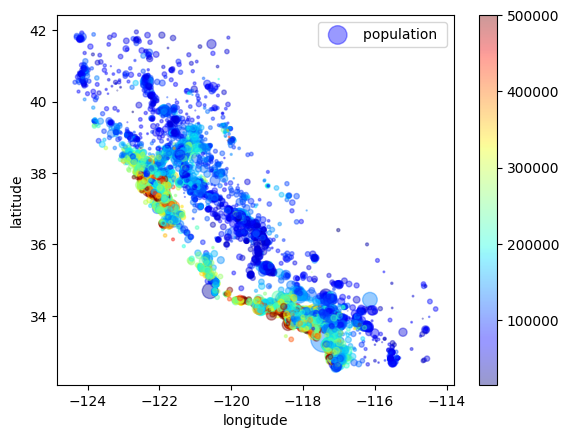

In [16]:
train_copy.plot(kind = 'scatter' , x="longitude", y="latitude" , alpha = 0.4, 
                s = train_copy['population']/100 , label = "population " 
                ,c = train_copy["median_house_value"] , cmap = plt.get_cmap("jet") , colorbar = True)
plt.legend()
plt.show()

In [17]:
train_copy.drop("ocean_proximity" , axis=1 , inplace=True)
train_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0


In [18]:
abh = train_copy.corr()
abh["median_house_value"].sort_values()

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='longitude', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>],
       [<Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='longitude', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>],
       [<Axes: xlabel='median_income', ylabel='latitude'>,
        <Axes: xlabel='median_house_value', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>]], dty

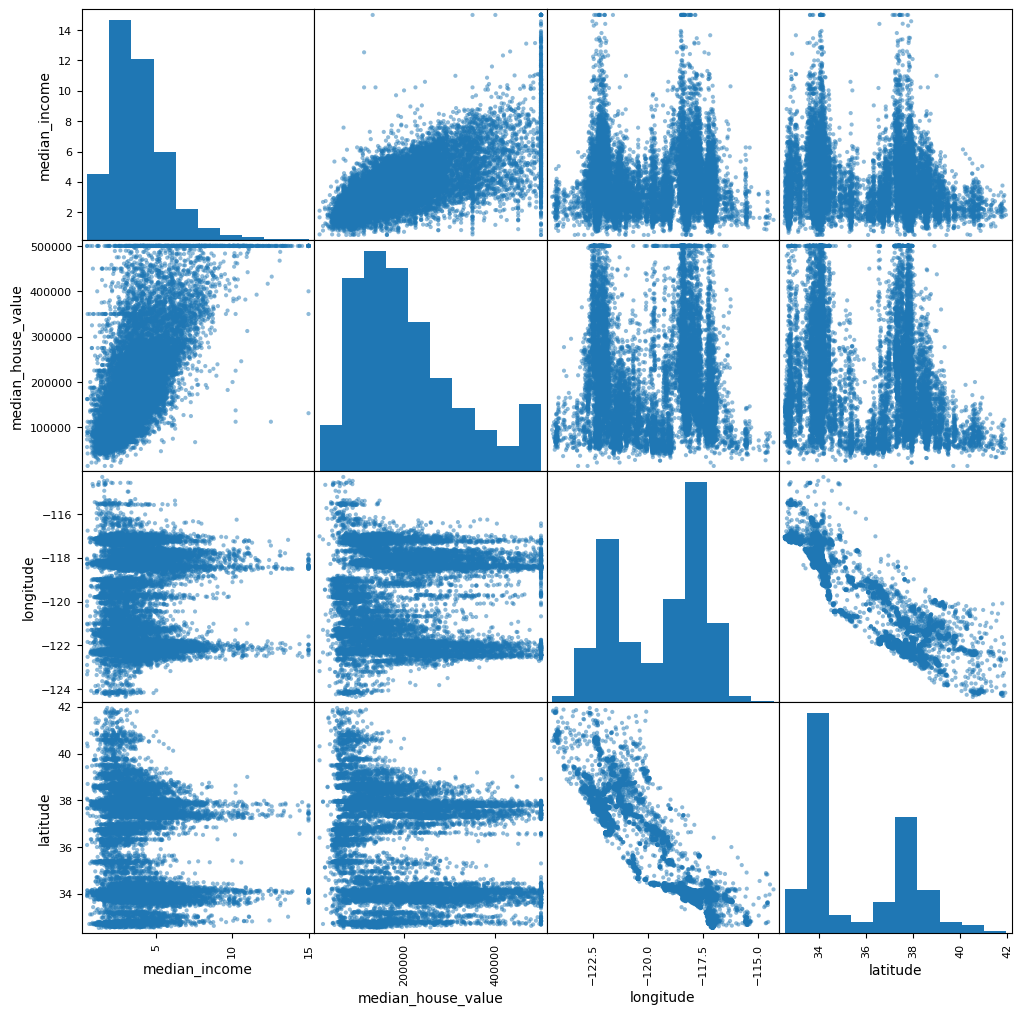

In [19]:
from pandas.plotting import scatter_matrix

atributes = ["median_income", "median_house_value" , "longitude" , "latitude"]
scatter_matrix(train_copy[atributes] , figsize=(12,12))

<Axes: xlabel='median_income', ylabel='median_house_value'>

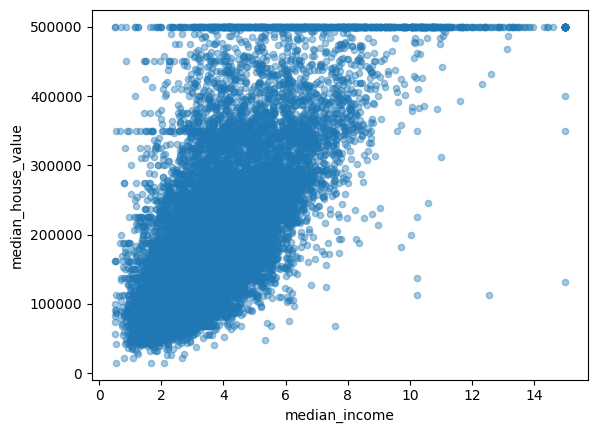

In [20]:
train_copy.plot(kind = "scatter" , x="median_income" , y= "median_house_value" , alpha = 0.4)

In [21]:
train_copy["rooms_per_households"] = train_copy["total_rooms"] / train_copy["households"]
train_copy["bedrooms_per_rooms"] = train_copy["total_bedrooms"] / train_copy["total_rooms"]
train_copy["population_per_households"] = train_copy["population"] / train_copy["households"]

In [22]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  16512 non-null  float64
 1   latitude                   16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   total_rooms                16512 non-null  float64
 4   total_bedrooms             16354 non-null  float64
 5   population                 16512 non-null  float64
 6   households                 16512 non-null  float64
 7   median_income              16512 non-null  float64
 8   median_house_value         16512 non-null  float64
 9   rooms_per_households       16512 non-null  float64
 10  bedrooms_per_rooms         16354 non-null  float64
 11  population_per_households  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [23]:
abhi = train_copy.corr()
abhi["median_house_value"].sort_values()

bedrooms_per_rooms          -0.259952
latitude                    -0.142673
longitude                   -0.047466
population                  -0.026882
population_per_households   -0.021991
total_bedrooms               0.047781
households                   0.064590
housing_median_age           0.114146
total_rooms                  0.135140
rooms_per_households         0.146255
median_income                0.687151
median_house_value           1.000000
Name: median_house_value, dtype: float64

In [24]:
hero = strat_train_set.drop("median_house_value" ,axis=1)
hero_labels = strat_train_set["median_house_value"]

In [25]:
hero_num = hero.drop("ocean_proximity" , axis=1 , inplace = False)
hero_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
hero_imputed = imputer.fit_transform(hero_num)
print(hero_imputed.shape)

(16512, 8)


In [27]:
from sklearn.base import BaseEstimator , TransformerMixin

room_ix , bedroom_ix , population_ix , household_ix = 3 , 4 , 5 , 6

class add_category(BaseEstimator , TransformerMixin):
    def __init__(self , add_bedrooms_per_rooms = True):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self , x  , y = None):
        return self
    def transform(self , x , y=None):
        population_per_households = x[: , population_ix] / x[: , household_ix]
        room_per_households = x[: , room_ix] / x[: , household_ix]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms = x[: , bedroom_ix] / x[: , room_ix]
            return np.c_[x ,bedrooms_per_rooms ,population_per_households , room_per_households]
        else:
            return np.c_[x , population_per_households , room_per_households]

trans = add_category(add_bedrooms_per_rooms= True)
hero_trans = trans.fit_transform(hero_imputed)
print(hero_imputed.shape,hero_trans.shape)



(16512, 8) (16512, 11)


In [28]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hero_imputed_scaled = scaler.fit_transform(hero_trans.astype(np.float64))
print(hero_imputed_scaled)

[[-0.94135046  1.34743822  0.02756357 ... -0.12112176  0.00622264
   0.01739526]
 [ 1.17178212 -1.19243966 -1.72201763 ... -0.81086696 -0.04081077
   0.56925554]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.33827252 -0.07537122
  -0.01802432]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.32286937 -0.03743619
  -0.5092404 ]
 [-1.56080303  1.2492109  -1.1653327  ... -0.45702273 -0.05915604
   0.32814891]
 [-1.28105026  2.02567448 -0.13148926 ... -0.12169672  0.00657083
   0.01407228]]


In [30]:
class Dataframeselector(BaseEstimator , TransformerMixin):

    def __init__(self , atribute_name):
        self.atribute_name = atribute_name
    def fit(self , x , y = None):
        return self
    def transform(self , x , y=None):
        return x[self.atribute_name].values

In [31]:
#Feature union #Transformer
from sklearn.pipeline import Pipeline , FeatureUnion
num_categories = list(hero_num)
txt_categories = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', Dataframeselector(num_categories)),
    ('imputer' , SimpleImputer(strategy="median")),
    ('add_category', add_category()),
    ('scaler' , StandardScaler()),
])

txt_pipeline = Pipeline([
    ('selector', Dataframeselector(txt_categories)),
    ('encoder', OneHotEncoder(sparse_output=False)),
])

total_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline" , num_pipeline),
    ("txt_pipeline" , txt_pipeline),
])


hero_total_transform = total_pipeline.fit_transform(hero)
print(hero_total_transform , hero_total_transform.shape)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]] (16512, 16)


In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(hero_total_transform , hero_labels)

LinearRegression()

In [33]:
some_data = hero.iloc[:5]
some_data_prepared = total_pipeline.transform(some_data)
ouput_labels = hero_labels.iloc[:5]
print("The output data are " , ouput_labels.values)
print("The predicted values are: " , lin_reg.predict(some_data_prepared))  

The output data are  [ 72100. 279600.  82700. 112500. 238300.]
The predicted values are:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [34]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(hero_total_transform)
lim_mse = mean_squared_error(hero_labels , housing_predictions)
lim_rmse = np.sqrt(lim_mse)
lim_rmse

68627.87390018745

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(hero_total_transform , hero_labels)

DecisionTreeRegressor()

In [36]:
tree_prediction = tree.predict(hero_total_transform)
tree_mse = mean_squared_error(hero_labels , tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree , hero_total_transform ,hero_labels, scoring='neg_mean_squared_error' , cv=10)



In [38]:
rmse_tree_scores = np.sqrt(-scores)

In [39]:
def display_score(scores):
    print("Scores: ", scores)
    print("Mean: " , scores.mean())
    print("Standard deviation: ", scores.std())

display_score(rmse_tree_scores)

Scores:  [72862.01009395 68948.2704232  68700.80669118 71986.88644153
 70027.92375756 78276.79345448 71955.85067301 73190.53221955
 68654.79699903 71382.82230401]
Mean:  71598.66930575122
Standard deviation:  2749.693225363357


In [40]:
lin_scores = cross_val_score(
    lin_reg,                          # Your linear regression model
    hero_total_transform,                 # Your prepared features
    hero_labels,                   # Target values (prices)
    scoring="neg_mean_squared_error", # Metric to use
    cv=10                             # 10-fold cross-validation
)

lin_rmse_scores = np.sqrt(-lin_scores)  # Convert to RMSE
display_score(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180634


In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(hero_total_transform , hero_labels)


RandomForestRegressor()

In [42]:
forst_prediction = forest.predict(hero_total_transform)
forest_mse = mean_squared_error( hero_labels , forst_prediction)
forest__rmse = np.sqrt(forest_mse)
forest__rmse

18612.489057166596

In [43]:
forest_predict_mse = cross_val_score(forest , hero_total_transform , hero_labels , scoring="neg_mean_squared_error" , cv=10)
forest_predict_rmse = np.sqrt(-forest_predict_mse)

In [44]:
display_score(forest_predict_rmse)

Scores:  [51511.69153001 49164.86718949 46735.45983866 51858.73393605
 47669.90445539 51764.39478805 52527.42171042 50079.82682039
 48200.20182883 53890.32469164]
Mean:  50340.28267889246
Standard deviation:  2219.175885086971


In [45]:
list[forest.get_params()]

list[{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}]

In [46]:
#Fine_Tuning 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3,10,30] , 'max_features' : [2,4,6,8]},
    {'bootstrap': [False] , 'n_estimators' : [3,10,30] , 'max_features' : [2,4,6,8] }
]

grid_search = GridSearchCV(forest , param_grid, scoring = "neg_mean_squared_error" , cv=2 , n_jobs=-1)
grid_search.fit(hero_total_transform , hero_labels)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

In [47]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30)

In [48]:
cvres = grid_search.cv_results_
for mean_score , parameters in zip(cvres["mean_test_score"] , cvres["params"]):
    print(np.sqrt(-mean_score) , parameters)

65648.06293161432 {'max_features': 2, 'n_estimators': 3}
57565.373883665416 {'max_features': 2, 'n_estimators': 10}
54723.623041278806 {'max_features': 2, 'n_estimators': 30}
61092.66352820387 {'max_features': 4, 'n_estimators': 3}
55051.51883127829 {'max_features': 4, 'n_estimators': 10}
52108.34362333781 {'max_features': 4, 'n_estimators': 30}
61387.95192370184 {'max_features': 6, 'n_estimators': 3}
54164.241662893706 {'max_features': 6, 'n_estimators': 10}
52123.858417633965 {'max_features': 6, 'n_estimators': 30}
61345.45448641733 {'max_features': 8, 'n_estimators': 3}
54084.36261255679 {'max_features': 8, 'n_estimators': 10}
52165.13671488558 {'max_features': 8, 'n_estimators': 30}
64519.01410122246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
56067.978688118164 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
53336.65598231561 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
59707.75680826112 {'bootstrap': False, 'max_features': 4, 'n_estimator

In [49]:
hero.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [50]:
feature_importancre = grid_search.best_estimator_.feature_importances_
feature_importancre #Esley chahi table ma data haru zasari chan tesari nai data lai firta dineyy bhayo

array([8.62599993e-02, 7.31972106e-02, 4.06835413e-02, 2.30619639e-02,
       1.91362300e-02, 2.26445508e-02, 1.97666768e-02, 2.62690665e-01,
       1.07511144e-01, 9.73194562e-02, 6.03260076e-02, 1.09122605e-02,
       1.65999365e-01, 4.41857020e-05, 5.29836614e-03, 5.14837645e-03])

In [51]:
from sklearn.preprocessing import LabelEncoder
hero_cat = hero["ocean_proximity"]
label = LabelEncoder()
encoder = OneHotEncoder()
labeled = label.fit_transform(hero_cat)
encoded = encoder.fit_transform(labeled.reshape(-1 , 1))

In [52]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(label.classes_)
atributes_1 = num_categories + cat_one_hot_attribs + extra_attribs
important = sorted(zip(feature_importancre , atributes_1) , reverse=True)

In [53]:
final_model = grid_search.best_estimator_ #Model chahi grid_search garda nai load bhayeko hoo tara grid-search.best_estimator use gareshin fine tuned model use huncha
x_test = strat_test_set.drop("median_house_value" , axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = total_pipeline.transform(x_test)

In [54]:
x_predict = final_model.predict(x_test_prepared)
final_mse_error = mean_squared_error(y_test , x_predict)
final_rmse_error = np.sqrt(final_mse_error)
final_rmse_error

47946.46303858256

In [55]:
# 1 . Different Hyperparameter tuning in the support vectore machine
from sklearn import svm

model = svm.SVR()
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [56]:
params_grid = [
    {'kernel' : ['linear'] , 'C' : [0.1 , 1 , 10]},
    {'kernel' : ['rbf'] , 'C' : [0.1 , 1 , 10] , 'gamma' : [0.001 , 0.01 , 0.1 , 'scale']}
]

grid_search_1 = GridSearchCV(model , params_grid , scoring="neg_mean_squared_error" , cv=3 , n_jobs=-1) #Eha grid search chahi euta model bhayo hai
grid_search_1.fit(hero_total_transform , hero_labels)


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 'scale'],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [57]:
grid_search_1.best_estimator_

SVR(C=10, kernel='linear')

In [58]:
curves = grid_search_1.cv_results_
for param , mean_scores in zip(curves["params"] , curves["mean_test_score"]):
    print(np.sqrt(-mean_scores)  , param)

118355.77617648437 {'C': 0.1, 'kernel': 'linear'}
113553.35239682348 {'C': 1, 'kernel': 'linear'}
87087.62463199237 {'C': 10, 'kernel': 'linear'}
118929.61742146073 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
118920.93958181755 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
118907.42823258483 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
118906.65820949663 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
118918.7190990193 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
118831.89952972681 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
118682.73827531734 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
118679.57593708171 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
118809.77256748655 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
118022.24949562753 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
116635.33747626714 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
116591.12193990443 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [59]:
model_fit = model.fit(hero_total_transform , hero_labels)

In [60]:
model_prediction = model.predict(hero_total_transform)
model_mse = mean_squared_error(hero_labels, model_prediction)
model_rmse = np.sqrt(model_mse)
model_rmse

118578.69234925653

In [61]:
model_cross = cross_val_score(model , hero_total_transform , hero_labels , scoring="neg_mean_squared_error" , cv=3)
model_cross_rmse = np.sqrt(-model_cross)

In [62]:
display_score(model_cross_rmse)

Scores:  [117322.86047768 119007.86479256 119695.44586435]
Mean:  118675.39037819904
Standard deviation:  996.726235036547


In [66]:
final_svm_model = grid_search_1.best_estimator_
x_svm_predict = final_svm_model.predict(x_test_prepared)
x_svm_mean = mean_squared_error(y_test , x_svm_predict)
x_svm_rmse = np.sqrt(x_svm_mean)
x_svm_rmse

80641.57697382719